In [1]:
'''
We will change the learning rates in the midst of the code. We can by:
1) Time (training epoch)
2) Derivative
3) Loss
4) Current local minimum value
'''

'\nWe will change the learning rates in the midst of the code. We can by:\n1) Time (training epoch)\n2) Derivative\n3) Loss\n4) Current local minimum value\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')

/var/folders/qm/y3ntm4w54lv2x8p86n_p1ml80000gn/T/ipykernel_40097/2884596146.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [3]:
#create function and its derivative
x = np.linspace(-2,2,2001)

def fx(x):
    return 3*x** - 3*x + 4

def deriv(x):
    return 6*x - 3

In [4]:
#Gradient descent using a fixed learning rate

#random starting point
localmin=np.random.choice(x,1)
initial=localmin[:]

#learning parameterers
learning_rate=.01
training_epochs=50

#run through training and store all the results
modelparamsFixed = np.zeros((training_epochs,3))
for i in range(training_epochs):
    
    #compute gradient
    grad=deriv(localmin)
    
    #non-adaptive learning rate
    lr = learning_rate
    
    #update parameter according to g.d.
    localmin = localmin - lr * grad
    
    #store the parameters
    modelparamsFixed[i, 0] = localmin
    modelparamsFixed[i, 1] = grad
    modelparamsFixed[i, 2] = lr
    

In [5]:
#GD using a gradient-based learning rate

#random starting point
localmin = np.random.choice(x,1)
initial = localmin[:]

#learning parameters
learning_rate = 0.01
training_epochs = 50

#run through training and store all the results
modelparamsGrad = np.zeros((training_epochs,3))

for i in range(training_epochs):
    
    #compute gradient
    grad = deriv(localmin)
    
    #adapt the learning rate according to the gradient
    lr = learning_rate * np.abs(grad)
    
    #update parameter according to g.d.
    localin = localmin - lr * grad
    
    #store parameters
    modelparamsGrad[i,0]=localmin
    modelparamsGrad[i,1]=grad
    modelparamsGrad[i,2]=lr

In [6]:
'''
The main idea here is when we are very far away from the dunction minimum,
the gradient is relatively large. That means the learning rate is relatively
larger. Conversely, the closer we get to the actual function minimum, the 
gradient gets closer and closer to 0. That means the effective learning
rate decreases. The learning rate is going to go towards 0 as the gradient 
gets smaller.
'''

'\nThe main idea here is when we are very far away from the dunction minimum,\nthe gradient is relatively large. That means the learning rate is relatively\nlarger. Conversely, the closer we get to the actual function minimum, the \ngradient gets closer and closer to 0. That means the effective learning\nrate decreases. The learning rate is going to go towards 0 as the gradient \ngets smaller.\n'

In [7]:
#Dynamic gradient descent using a time-based learing rate

#redefine parameters
learning_rate = .1
localmin = initial

#run through training and store all the results
modelparamsTime = np.zeros((training_epochs,3))
for i in range(training_epochs):
    grad = deriv(localmin)
    lr = learning_rate * (1- ((i+1)/training_epochs))
    localmin = localmin - lr * grad
    modelparamsGrad[i,0]=localmin
    modelparamsGrad[i,1]=grad
    modelparamsGrad[i,2]=lr

In [8]:
'''
Here, the value of (i+1)/training_epochs) is very low. So 1 gets reduced
by a very small account. But as  i increases and gets closer to 50, 
(i+1)/training_epochs) becomes closer to 1 and the value subsequently 
becomes closer to 0 which means the effective learning rate is decreasing
as the learning increases.
'''

'\nHere, the value of (i+1)/training_epochs) is very low. So 1 gets reduced\nby a very small account. But as  i increases and gets closer to 50, \n(i+1)/training_epochs) becomes closer to 1 and the value subsequently \nbecomes closer to 0 which means the effective learning rate is decreasing\nas the learning increases.\n'

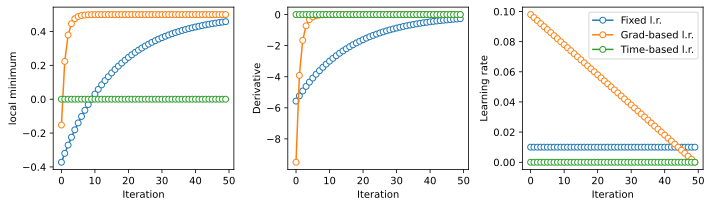

In [9]:
#Plot the results
fig, ax = plt.subplots(1,3,figsize=(10,3))

#generate the plots
for i in range(3):
    ax[i].plot(modelparamsFixed[:,i],'o-',markerfacecolor='w')
    ax[i].plot(modelparamsGrad[:,i],'o-',markerfacecolor='w')
    ax[i].plot(modelparamsTime[:,i],'o-',markerfacecolor='w')
    ax[i].set_xlabel('Iteration')

ax[0].set_ylabel('local minimum')
ax[1].set_ylabel('Derivative')
ax[2].set_ylabel('Learning rate')
ax[2].legend(['Fixed l.r.','Grad-based l.r.','Time-based l.r.'])
    
plt.tight_layout()
plt.show()